<a href="https://colab.research.google.com/github/Anastasiia-Khab/homeworks-ucu/blob/master/ContentBasedImageRetrival_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import re
import glob
import pickle
import imutils
import itertools
import cv2 as cv
import matplotlib
import numpy as np
from tqdm import tqdm
from skimage import io
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from google.colab.patches import cv2_imshow
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
%matplotlib inline

In [0]:
def url_to_image(url):
  print("downloading %s" % (url))
  return cv.cvtColor(io.imread(url), cv.COLOR_BGR2RGB)

downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00000.jpg
downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00001.jpg
(480, 640, 3)
(480, 640, 3)


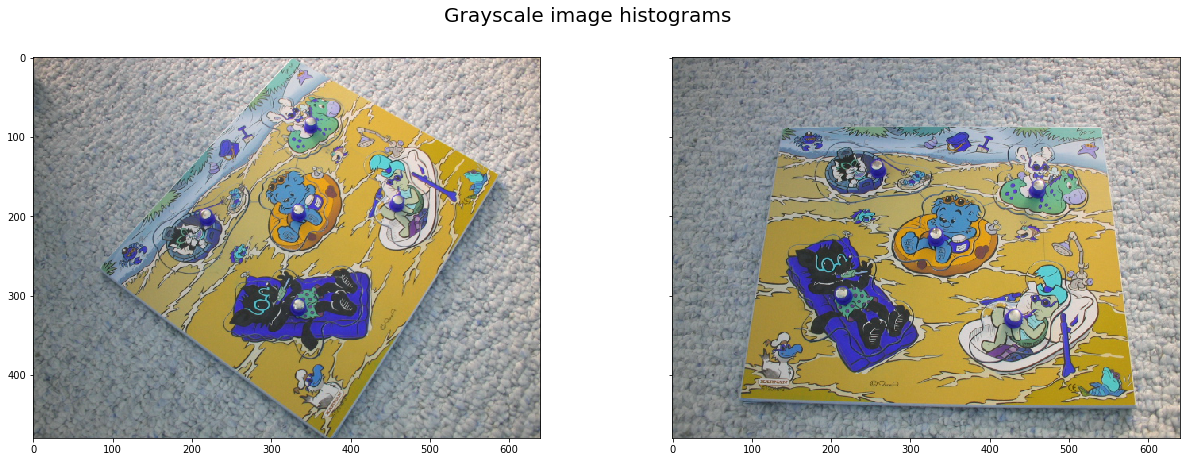

In [3]:
#img = cv2.resize(url_to_image(url1), (0,0), fx=0.25, fy=0.25)

url1= "http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00000.jpg"
url2= "http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00001.jpg"
im = url_to_image(url1)
im2 = url_to_image(url2)
fig, axs = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(7)
fig.set_figwidth(21)
fig.suptitle('Grayscale image histograms', fontsize=20)

print(im.shape)

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
axs[0].imshow(im)
axs[1].imshow(im2)

print(im.shape)

#### Problem 1

Write a program to extract the color histogram of each of the 2,000 images. Choose the
parameters required with justifications. Implement your own histogram code and compare its
results with open-source API like OpenCV and numpy.

##### *Extracting the color histogram of each of the images in the list for each channel*

In [0]:
# Extracts the color histogram of each of the images in the list for each channel

# Params:
# images - list of images
# channels - list of numbers of channels. example: [0,1,2] for rgb channels
def calculate_image_hist(images, channels):
  histograms=[]
  for im in images:
    height, width, _ = im.shape
    histogram_im=[]
    for ch in range(len(channels)):
      #uses numpy histogram with the channel values respectively
      histogram_im_ch,bins = np.histogram(im[:,:,channels[ch]],256,[0,256])
      histogram_im.append(histogram_im_ch)
    histograms.append(histogram_im)
  return histograms, bins

##### Plotting 3 separate color histograms calculated with Numpy and OpenCV tools for each channel separately to compare

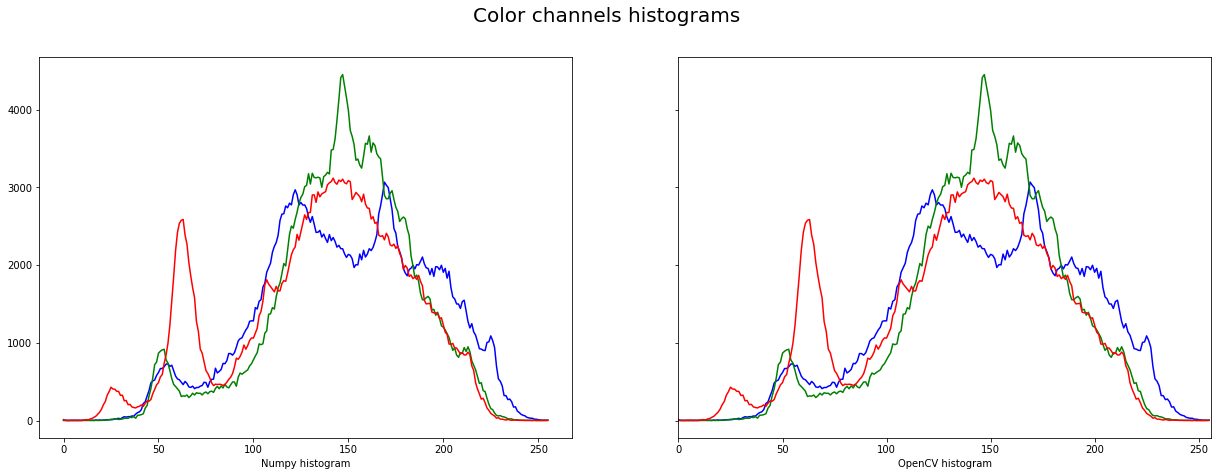

In [5]:
# plotting 3 separate color histograms calculated with Numpy and OpenCV tools for each channel separately to compare

fig, axs = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(7)
fig.set_figwidth(21)
fig.suptitle('Color channels histograms', fontsize=20)
axs[0].set_xlabel("Numpy histogram", fontsize=10)
axs[1].set_xlabel("OpenCV histogram", fontsize=10)

hist_my,bins=calculate_image_hist([im], [0,1,2])
hist_my2,bins=calculate_image_hist([im2], [0,1,2])
for i,col in enumerate(('b','g','r')):
    axs[0].plot(bins[:-1], hist_my[0][i], color = col)
    hist_opencv = cv.calcHist([im],[i],None,[256],[0,256])
    axs[1].plot(hist_opencv,color = col)
    plt.xlim([0,256])
plt.show()

#####  Plotting GRAY scale histograms calculated with Numpy and OpenCV tools to compare

<BarContainer object of 256 artists>

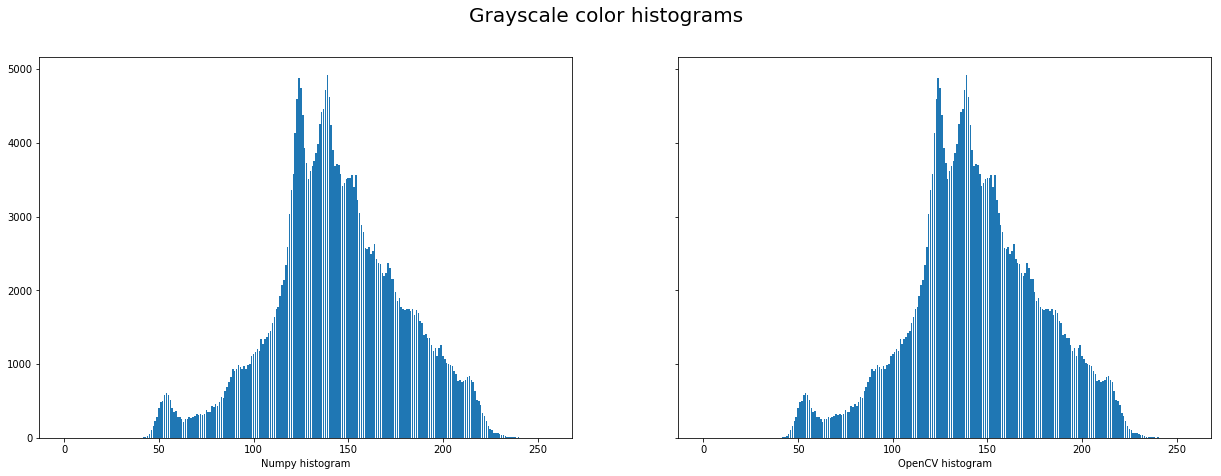

In [6]:
# plotting GRAY scale histograms calculated with Numpy and OpenCV tools to compare

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(7)
fig.set_figwidth(21)
fig.suptitle('Grayscale color histograms', fontsize=20)
axs[0].set_xlabel("Numpy histogram", fontsize=10)
axs[1].set_xlabel("OpenCV histogram", fontsize=10)

hist_np,bins = np.histogram(gray.ravel(),256,[0,256]) # numpy  grayscale
axs[0].bar(bins[:-1], hist_np)
hist_opencv = cv.calcHist([gray],[0],None,[256],[0,256]) # opencv grayscale
axs[1].bar(bins[:-1], hist_opencv[:, 0])

##### Reading list of images from the link and pickling them into drive. Here I commented a lot, in order to speed up. So only pickled images from drive are loaded indeed

In [0]:
#Reading list of images from the link and pickling them into drive

#url_begin = "http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench"
#url_end = ".jpg"
#urls = [url_begin+str(i).zfill(5)+url_end for i in range(2000)]
#images = [url_to_image(ur) for ur in urls]
#hists_bins = calculate_image_hist(images,[0,1,2])

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls
GDRIVE_DIR = "gdrive/My Drive/Colab Notebooks/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


In [9]:
#output = open('gdrive/My Drive/Colab Notebooks/images.pkl', 'wb')
#pickle.dump(images,output)
os.listdir('gdrive/My Drive/Colab Notebooks')

['Untitled0.ipynb',
 'Problem Set 3 – Eigenfaces.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Copy of Descriptors.ipynb',
 'images1.pkl',
 'images2000.pkl',
 'histograms2000.pkl',
 'histograms10.pkl',
 'histograms_cv.pkl',
 'histograms.pkl',
 'Copy of Copy of ContentBasedImageRetrival .ipynb',
 'Copy of ContentBasedImageRetrival .ipynb']

In [0]:
filename = 'gdrive/My Drive/Colab Notebooks/images2000.pkl'
with open(filename, 'rb') as pickle_file:
    images1 = pickle.load(pickle_file)


#### Here I computed openCV and an own implementations of the histograms for three channels.

I used an approach to compute content based RGB histogram from here https://github.com/pochih/CBIR. It has (number_of_bins for each channel=12)^(number_of_channels=3) bins. As a values for each bin it computes the occurances of the values of three channels having color value in some interval. 

In [0]:
def histogram_opencv(image, bins, scale):
		# extract a 3D color histogram from the masked region of the
		# image, using the supplied number of bins per channel
    if scale=='hsv':
      hist = cv.calcHist([image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    else:
      hist = cv.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    
    if imutils.is_cv2():
      hist = cv.normalize(hist).flatten()
 
		# otherwise handle for OpenCV 3+
    else:
      #hist = cv.normalize(hist, hist).flatten()
      hist /= np.sum(hist)
      hist = hist.flatten()
      #hist = (hist.flatten())/np.sum(hist.flatten())
 
		# return the histogram
    #print(len(hist))
    return hist

In [0]:
# configs for histogram
n_bin   = 10        # histogram bins

class Color(object):

  def histogram(self, input, n_bin=n_bin, normalize=True):
    """ count img color histogram
  
      arguments
        input    : a path to a image or a numpy.ndarray
        n_bin    : number of bins for each channel
        normalize: normalize output histogram
  
      return
        a numpy array with size n_bin ** channel
    """
    if isinstance(input, np.ndarray):  # examinate input type
      img = input.copy()
    else:
      img = scipy.misc.imread(input, mode='RGB')
    height, width, channel = img.shape
    bins = np.linspace(0, 256, n_bin+1, endpoint=True)  # slice bins equally for each channel
    #print(bins)

    hist = self._count_hist(img, n_bin, bins, channel)
  
  
    if normalize:
      hist /= np.sum(hist)
  
    return hist.flatten()
  
  
  def _count_hist(self, input, n_bin, bins, channel):
    img = input.copy()
    bins_idx = {key: idx for idx, key in enumerate(itertools.product(np.arange(n_bin), repeat=channel))}  # permutation of bins
    #print(bins_idx)
    #print( enumerate(itertools.product(np.arange(n_bin), repeat=channel)))
    hist = np.zeros(n_bin ** channel)
  
    # cluster every pixels
    for idx in range(len(bins)-1):
      img[(input >= bins[idx]) & (input < bins[idx+1])] = idx
    # add pixels into bins
    height, width, _ = img.shape
    for h in range(height):
      for w in range(width):
        b_idx = bins_idx[tuple(img[h,w])]
        #print(tuple(img[h,w]))
        hist[b_idx] += 1
  
    return hist
  


Number of bins in own implementation : 1000
Number of bins in opencv implementation : 1000


<BarContainer object of 1000 artists>

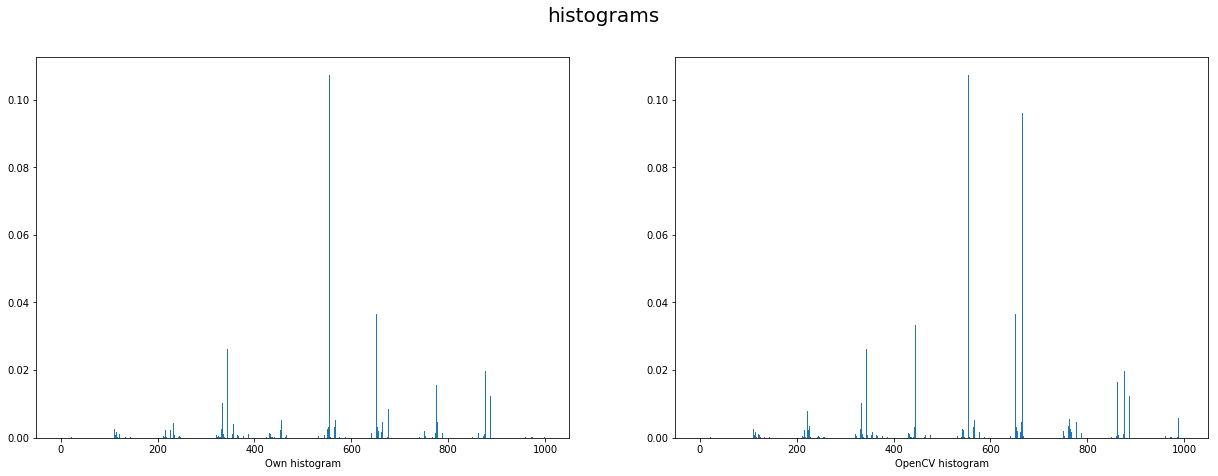

In [13]:
#comparing openCV and an own implementations of RGB histogram
color = Color()
hist_own = color.histogram(im, n_bin=n_bin)
hist_own2 = color.histogram(im2, n_bin=n_bin)
hist_cv=  histogram_opencv(im,[n_bin,n_bin,n_bin], [0, 256, 0, 256, 0, 256])
print("Number of bins in own implementation : "+str(len(hist_own)))
print("Number of bins in opencv implementation : "+str(len(hist_cv)))
 
fig, axs = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(21)
fig.suptitle('histograms', fontsize=20)
axs[0].set_xlabel("Own histogram", fontsize=10)
axs[1].set_xlabel("OpenCV histogram", fontsize=10)

axs[0].bar(range(len(hist_own)), hist_own)
axs[1].bar(range(len(hist_cv)), hist_cv)

##### Computing and pickling to drive histograms for all images

In [0]:
#histograms_cv=[]
#for im in tqdm(images1):
#  histograms_cv.append(histogram_opencv(im,[n_bin,n_bin,n_bin], [0, 256, 0, 256, 0, 256]))

In [0]:
#histograms_own=[]
#for im in tqdm(images1):
#  histograms_own.append(color.histogram(im, type='global', n_bin=n_bin))

In [16]:
#output = open('gdrive/My Drive/Colab Notebooks/histograms_cv.pkl', 'wb')
#pickle.dump(histograms_cv,output)
os.listdir('gdrive/My Drive/Colab Notebooks')

['Untitled0.ipynb',
 'Problem Set 3 – Eigenfaces.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Copy of Descriptors.ipynb',
 'images1.pkl',
 'images2000.pkl',
 'histograms2000.pkl',
 'histograms10.pkl',
 'histograms_cv.pkl',
 'histograms.pkl',
 'Copy of Copy of ContentBasedImageRetrival .ipynb',
 'Copy of ContentBasedImageRetrival .ipynb']

##### Loading alredy computed abow own implemented and opencv histograms :



histograms10.pkl - computed histograms with opencv n_bin=(10, 10, 10)


In [0]:
filename = 'gdrive/My Drive/Colab Notebooks/histograms_cv.pkl'
with open(filename, 'rb') as pickle_file:
    histograms_cv = pickle.load(pickle_file)

histograms10.pkl - computed histograms with my own method. n_bin=10

In [0]:
filename = 'gdrive/My Drive/Colab Notebooks/histograms10.pkl'
with open(filename, 'rb') as pickle_file:
    histograms_own = pickle.load(pickle_file)

#### Problem 2

Write a program to measure the L2 distance between color histograms of two images.


In [0]:
def distance(hist1, hist2, d_type='L2'):
  assert hist1.shape == hist2.shape, "to compute the distance shape of two vectors need to be same!"

  if d_type == 'L1':
    return np.sum(np.absolute(hist1 - hist2))
  elif d_type == 'L2':
    return np.sqrt(np.sum((hist1 - hist2) ** 2))

In [20]:
print("L2 distance between own histograms computed for two images")
print(distance(hist_own, hist_own2, d_type='L2'))
print("L2 distance between own histogram and open_cv histogram computed for one image")
print(distance(hist_own, hist_cv, d_type='L2'))

L2 distance between own histograms computed for two images
0.0499107101868941
L2 distance between own histogram and open_cv histogram computed for one image
4.6610352727381685e-09


#### Problem 3

Use 5 images shown above (ukbench00004.jpg; ukbench00040.jpg; ukbench00060.jpg;
ukbench00588.jpg; ukbench01562.jpg) as queries. For each query image, find 10 best matches
from the 2,000 images based on the color histogram similarity.
Plot the query image and the 10 returned matches (use icons of reduced resolution to save
space).

In [21]:
im4=url_to_image("http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00004.jpg")
im40=url_to_image("http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00040.jpg")
im60=url_to_image("http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00060.jpg")
im588=url_to_image("http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00588.jpg")
im1562=url_to_image("http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench01562.jpg")
hist4 = color.histogram(im4,  n_bin=n_bin)
hist40 = color.histogram(im40, n_bin=n_bin)
hist60 = color.histogram(im60,  n_bin=n_bin)
hist588 = color.histogram(im588, n_bin=n_bin)

downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00004.jpg
downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00040.jpg
downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00060.jpg
downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00588.jpg
downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench01562.jpg


In [0]:
def get_top_10_closest(im_histogram, histograms, images, d_type):
    distances = {i:distance(im_histogram, histograms[i], d_type) for i in range(len(histograms))}
    distances = sorted(distances.items(), key=lambda x: x[1])
    return (distances[0:11])

In [0]:
import math  

def plot_10_for_image(im,im_histogram, histograms, images, n_bin, d_type='L2'):
  closest_images=get_top_10_closest(im_histogram, histograms,images, d_type)
  images_in_line = 5
  fig,axs = plt.subplots(3, images_in_line)
  fig.set_figheight(15)
  fig.set_figwidth(15)
  # removing axes
  axs[0,0].set_axis_off();axs[0,2].set_axis_off();axs[0,4].set_axis_off();
  axs[0,1].imshow(im)
  axs[0,1].set_title("Query image")
  axs[0,1].set_axis_off()
  axs[0,3].bar(range(len(im_histogram)), im_histogram)
  axs[0,3].set_title("Query image histogram")
  
  for i in range(10):
      col = math.floor(i / images_in_line) + 1
      row = i % images_in_line
      axs[col,row].set_axis_off()
      axs[col,row].imshow(images[closest_images[i][0]])
      axs[col,row].set_title("Index of the closest : \n"+str(closest_images[i][0])+" \nDiff value : \n"+str(closest_images[i][1]))

**10 best matches from the 2,000 images based on the color histogram (own and opencv implementations) similarity for the image ukbench00004.jpg as a query : (as you can see , the results are the same)** 

Computed using my own implementation. As a distnace L2 norm is used


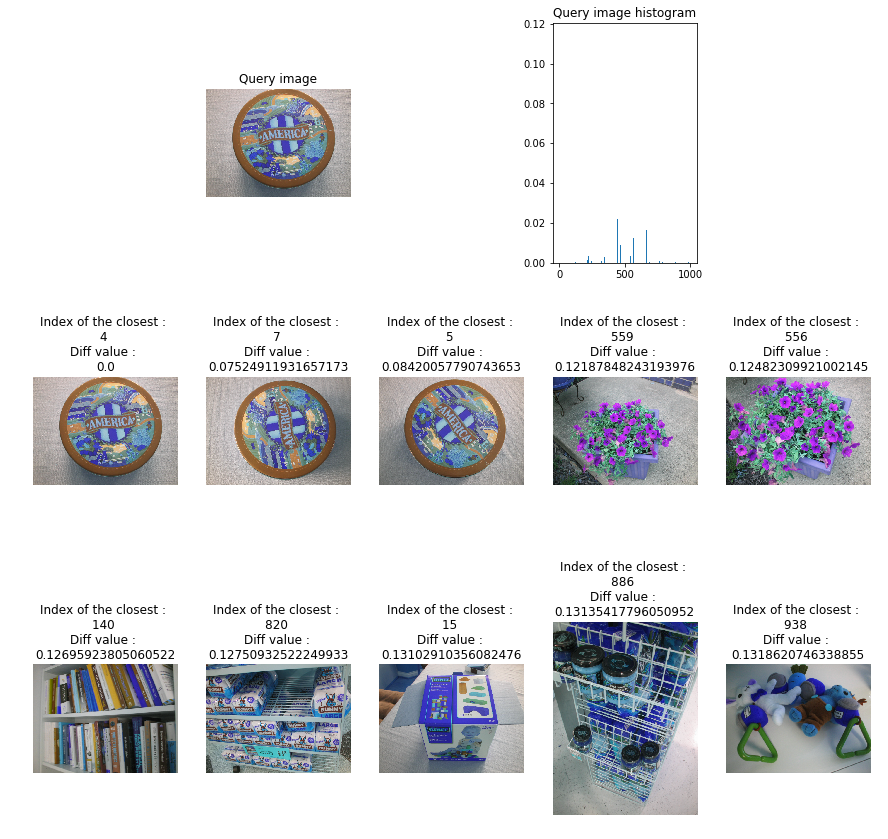

In [24]:
print("Computed using my own implementation. As a distnace L2 norm is used")
plot_10_for_image(im4,color.histogram(im4,  n_bin=n_bin), histograms_own, images1, n_bin,'L2')

Computed using opencv implementation. As a distnace L2 norm is used


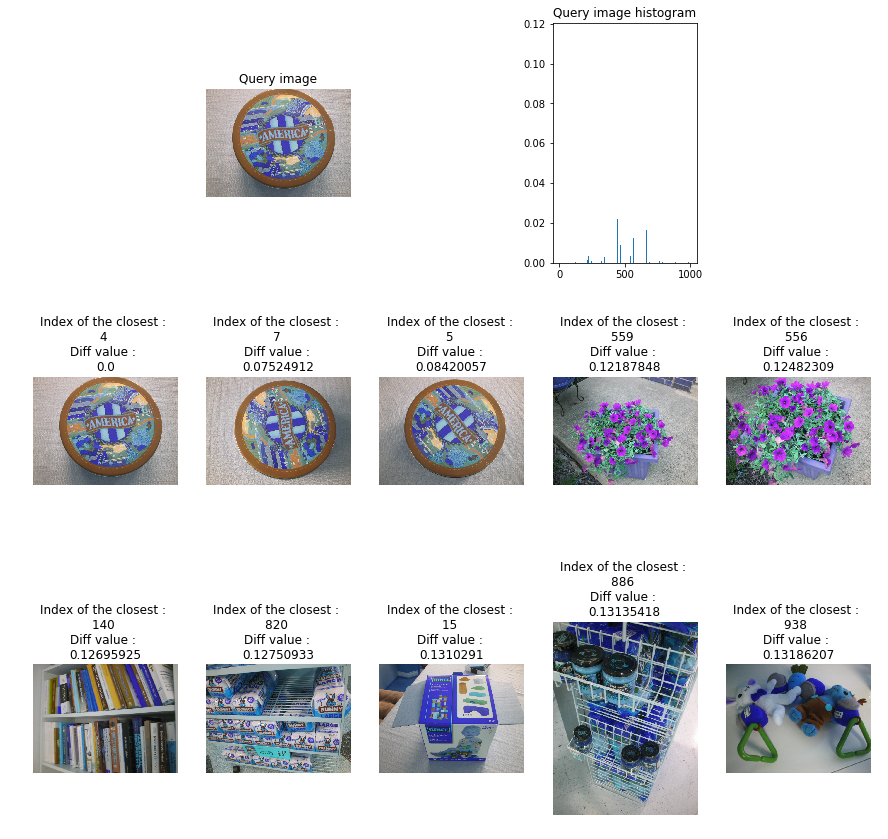

In [25]:
print("Computed using opencv implementation. As a distnace L2 norm is used")
plot_10_for_image(im4,histogram_opencv(im4,[n_bin,n_bin,n_bin], [0, 256, 0, 256, 0, 256]), histograms_cv, images1, n_bin,'L2')

**10 best matches from the 2,000 images based on the color histogram (own and opencv implementations) similarity for the image ukbench00040.jpg as a query : (as you can see , the results are the same)** 

Computed using my own implementation. As a distnace L2 norm is used


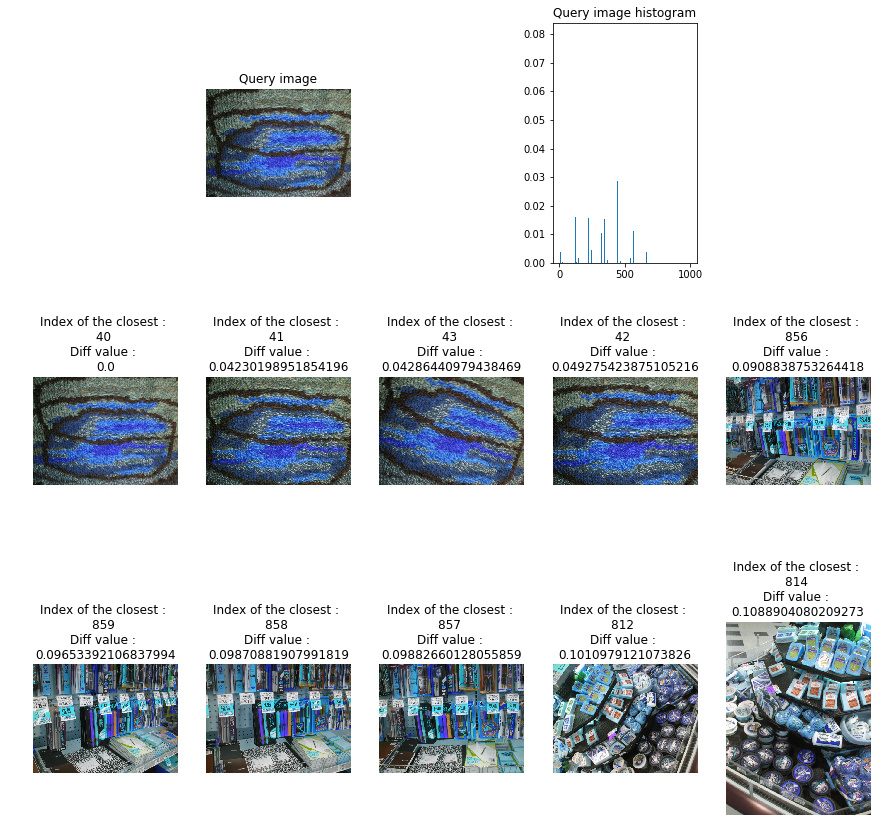

In [26]:
print("Computed using my own implementation. As a distnace L2 norm is used")
plot_10_for_image(im40,color.histogram(im40,  n_bin=n_bin), histograms_own, images1, n_bin,'L2')

Computed using opencv implementation. As a distnace L2 norm is used


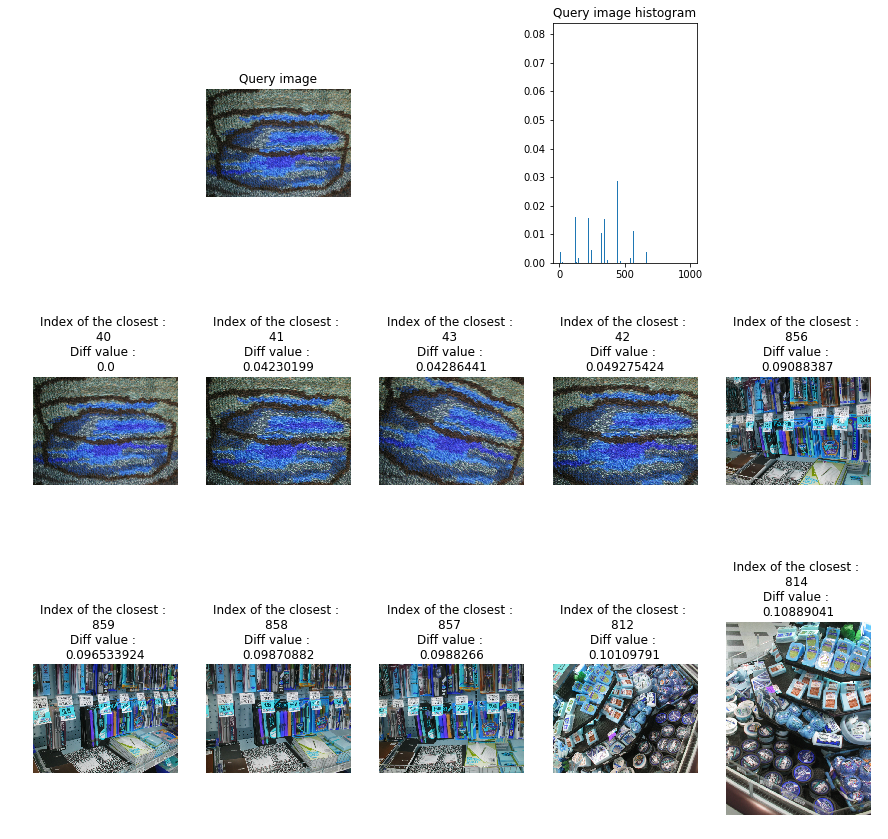

In [27]:
print("Computed using opencv implementation. As a distnace L2 norm is used")
plot_10_for_image(im40,histogram_opencv(im40,[n_bin,n_bin,n_bin], [0, 256, 0, 256, 0, 256]), histograms_cv, images1, n_bin,'L2')

Next, I will plot only matches from the 2000 images based on the color histogram computed by my own method, as the results of my own method and open cv method are the same. I  checked this.

**10 best matches from the 2,000 images based on the color histogram similarity for the image ukbench00060.jpg as a query :** 

Computed using my own implementation. As a distnace L2 norm is used


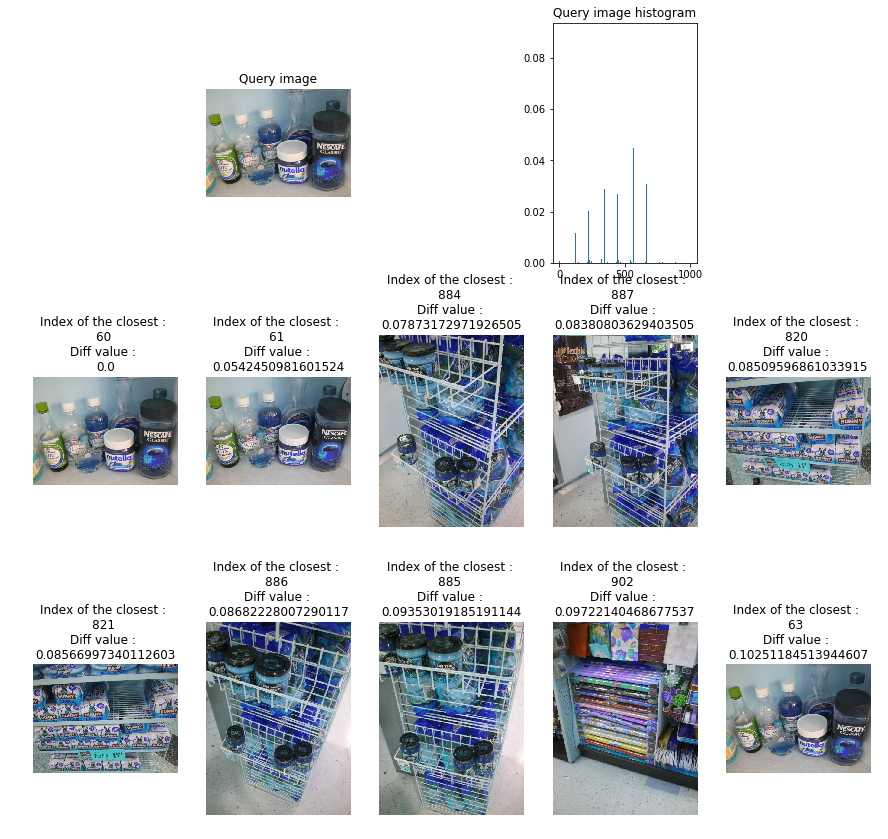

In [28]:
print("Computed using my own implementation. As a distnace L2 norm is used")
plot_10_for_image(im60,color.histogram(im60,  n_bin=n_bin), histograms_own, images1, n_bin,'L2')

**10 best matches from the 2,000 images based on the color histogram similarity for the image ukbench00588.jpg as a query :** 

Computed using my own implementation. As a distnace L2 norm is used


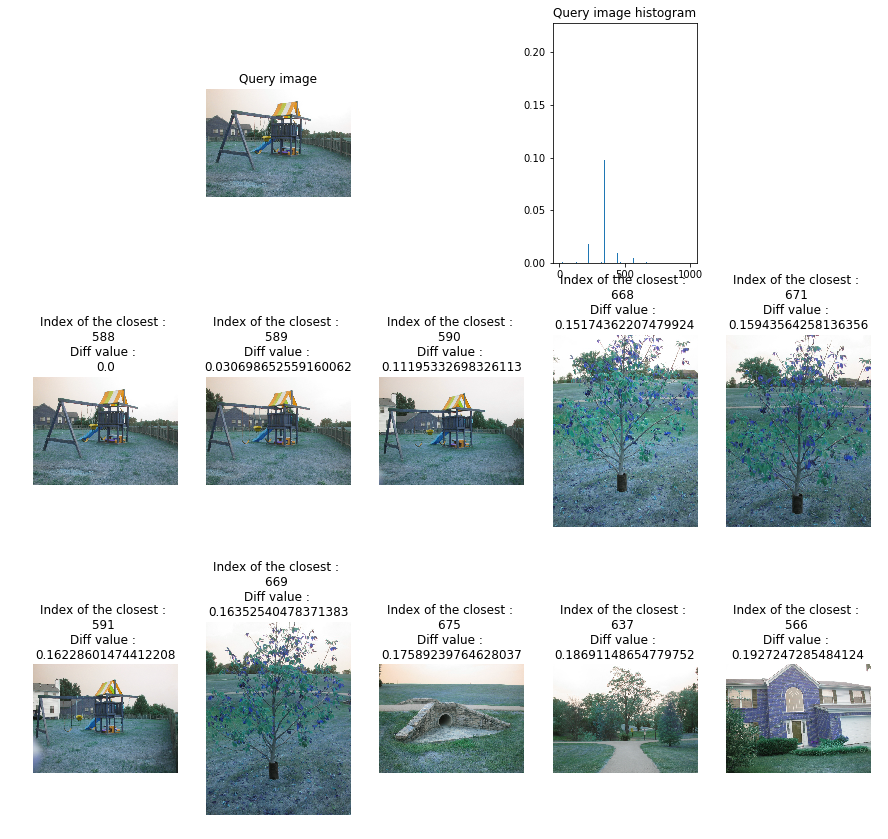

In [29]:
print("Computed using my own implementation. As a distnace L2 norm is used")
plot_10_for_image(im588,color.histogram(im588,  n_bin=n_bin), histograms_own, images1, n_bin,'L2')

**10 best matches from the 2,000 images based on the color histogram similarity for the image ukbench01562.jpg as a query :** 

Computed using my own implementation. As a distnace L2 norm is used


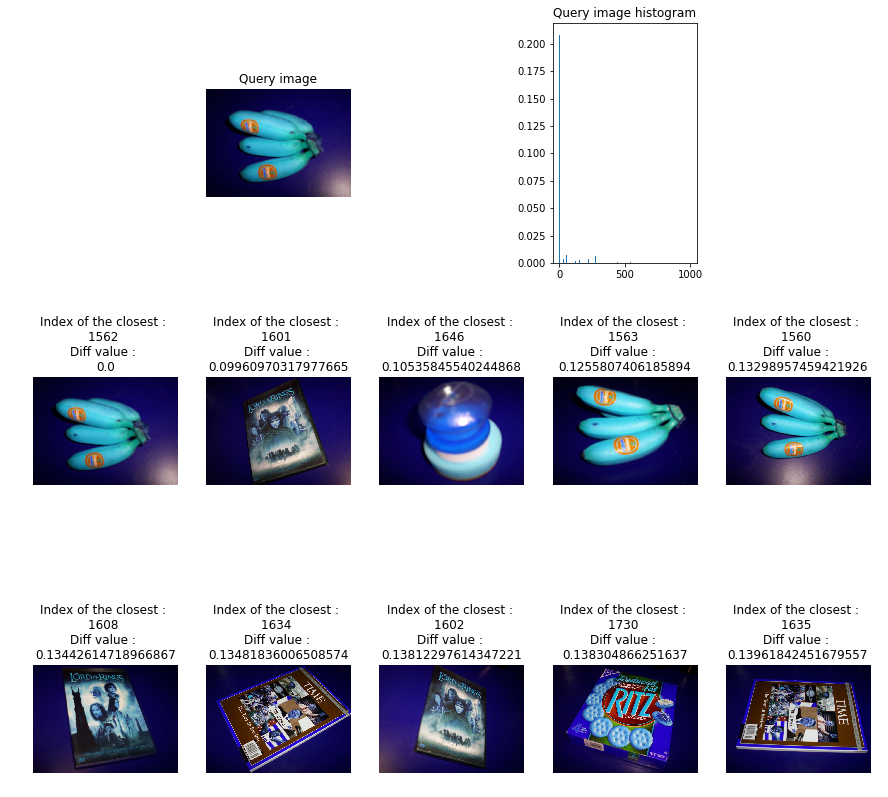

In [30]:
print("Computed using my own implementation. As a distnace L2 norm is used")
plot_10_for_image(im1562,color.histogram(im1562,  n_bin=n_bin), histograms_own, images1, n_bin,'L2')


#### Problem 4

Write a program to measure and plot the P-R curve for each query.


In order to plot a P-R curve we need to have some scores. I thought that assigning 1 to all 10 or 4 images is not right because then we would have only one probability and PR curve would have just two possible values, so this wouldn't be interesting. I decided to assign a scores from 11 to 1 to all the 11 images computed by the method (the fist one equals to the query image). Then I compute softmax values for all this images and create a two vectors of size 2000:
                              
```
1) predicted =                               
             softmax value  (if image is from 11 images predicted by the CB histogram method)
             0 (otherwise)

2) true = 
              1 (if image is from the same class as the query image) 
              0 (otherwise)
```

Then I used *precision_recall_curve* method from openCV to plot the PR-curves

In [31]:
scores = [11,10,9,8,7,6,5,4,3,2,1]

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

print(softmax(scores))
probabilities = softmax(scores)

[6.32131116e-01 2.32548042e-01 8.55496437e-02 3.14719551e-02
 1.15778853e-02 4.25926596e-03 1.56689638e-03 5.76428965e-04
 2.12056366e-04 7.80111772e-05 2.86987083e-05]


In [0]:
from sklearn.metrics import precision_recall_curve
from inspect import signature
def p_r_curve(true_values, scores):
    precision, recall, _ = precision_recall_curve(true_values, scores)
    
    step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00004.jpg
true index : 4
predicted index : 4 softmax value : 0.6321311164933255
true index : 5
predicted index : 5 softmax value : 0.08554964369330043
true index : 6
true index : 7
predicted index : 7 softmax value : 0.23254804188264452
predicted index : 15 softmax value : 0.0005764289649961045
predicted index : 140 softmax value : 0.004259265959404748
predicted index : 556 softmax value : 0.01157788526002411
predicted index : 559 softmax value : 0.031471955114307365
predicted index : 820 softmax value : 0.0015668963809463662
predicted index : 886 softmax value : 0.00021205636551779983
predicted index : 887 softmax value : 2.869870828947811e-05
predicted index : 938 softmax value : 7.801117724353531e-05


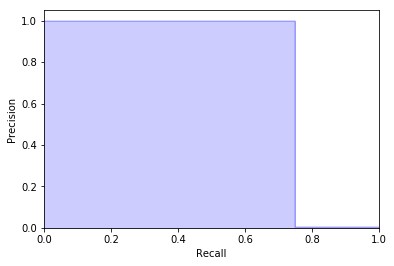

downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00040.jpg
true index : 40
predicted index : 40 softmax value : 0.6321311164933255
true index : 41
predicted index : 41 softmax value : 0.23254804188264452
true index : 42
predicted index : 42 softmax value : 0.031471955114307365
true index : 43
predicted index : 43 softmax value : 0.08554964369330043
predicted index : 812 softmax value : 0.00021205636551779983
predicted index : 814 softmax value : 7.801117724353531e-05
predicted index : 856 softmax value : 0.01157788526002411
predicted index : 857 softmax value : 0.0005764289649961045
predicted index : 858 softmax value : 0.0015668963809463662
predicted index : 859 softmax value : 0.004259265959404748
predicted index : 903 softmax value : 2.869870828947811e-05


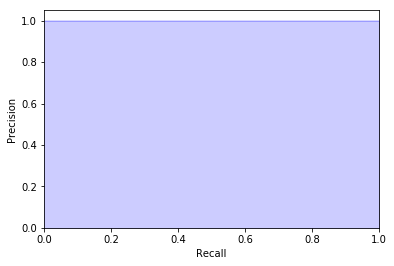

downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00060.jpg
true index : 60
predicted index : 60 softmax value : 0.6321311164933255
true index : 61
predicted index : 61 softmax value : 0.23254804188264452
true index : 62
true index : 63
predicted index : 63 softmax value : 7.801117724353531e-05
predicted index : 807 softmax value : 2.869870828947811e-05
predicted index : 820 softmax value : 0.01157788526002411
predicted index : 821 softmax value : 0.004259265959404748
predicted index : 884 softmax value : 0.08554964369330043
predicted index : 885 softmax value : 0.0005764289649961045
predicted index : 886 softmax value : 0.0015668963809463662
predicted index : 887 softmax value : 0.031471955114307365
predicted index : 902 softmax value : 0.00021205636551779983


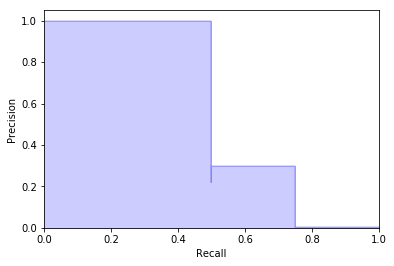

downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench00588.jpg
predicted index : 566 softmax value : 7.801117724353531e-05
true index : 588
predicted index : 588 softmax value : 0.6321311164933255
true index : 589
predicted index : 589 softmax value : 0.23254804188264452
true index : 590
predicted index : 590 softmax value : 0.08554964369330043
true index : 591
predicted index : 591 softmax value : 0.004259265959404748
predicted index : 637 softmax value : 0.00021205636551779983
predicted index : 668 softmax value : 0.031471955114307365
predicted index : 669 softmax value : 0.0015668963809463662
predicted index : 671 softmax value : 0.01157788526002411
predicted index : 674 softmax value : 2.869870828947811e-05
predicted index : 675 softmax value : 0.0005764289649961045


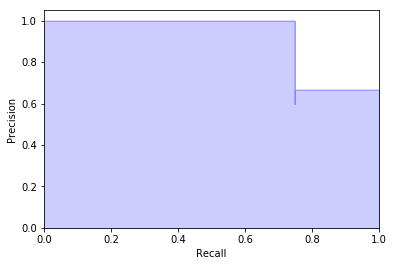

downloading http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench01562.jpg
true index : 1560
predicted index : 1560 softmax value : 0.01157788526002411
true index : 1561
true index : 1562
predicted index : 1562 softmax value : 0.6321311164933255
true index : 1563
predicted index : 1563 softmax value : 0.031471955114307365
predicted index : 1590 softmax value : 2.869870828947811e-05
predicted index : 1601 softmax value : 0.23254804188264452
predicted index : 1602 softmax value : 0.0005764289649961045
predicted index : 1608 softmax value : 0.004259265959404748
predicted index : 1634 softmax value : 0.0015668963809463662
predicted index : 1635 softmax value : 7.801117724353531e-05
predicted index : 1646 softmax value : 0.08554964369330043
predicted index : 1730 softmax value : 0.00021205636551779983


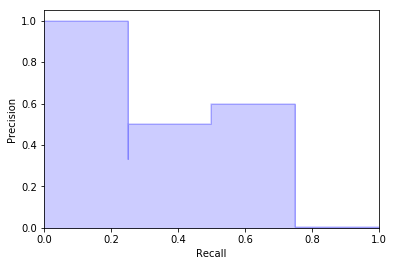

In [33]:
im_numbers_query=[4,40,60,588,1562]
url_begin = "http://www.ee.columbia.edu/~rj2349/index_files/Homework1/ukbench"
url_end = ".jpg"
#urls = [url_begin+str(i).zfill(5)+url_end for i in range(2000)]
for i in im_numbers_query:
    url = url_begin+str(i).zfill(5)+url_end
    im=url_to_image(url)
    im_histogram = color.histogram(im, n_bin=n_bin)
    closest_images=get_top_10_closest(im_histogram, histograms_own,images1, 'L2')
    predicted = np.zeros(2000)
    true = np.zeros(2000)
    images_in_group = 4
    start_group_index = i-int(i%images_in_group)
    closest = [closest[0] for closest in closest_images]
    #print(closest)
    for j in range(2000):
        if j in range(start_group_index, start_group_index + images_in_group):
            true[j] = 1
            print("true index : "+str(j))
        if j in closest:
            #print(j)
            #print(closest.index(j))
            predicted[j] = probabilities[closest.index(j)]
            print("predicted index : "+str(j)+ " softmax value : "+ str(probabilities[closest.index(j)]))
            
    p_r_curve(true, predicted)


#### Problem 5

Discuss and explain success and failure cases.


As we can observe, the results are better if the content based histogram values are more normally distributed and have different and small values in the bins.  For example, the best results are shown by im40 and the worst by im1562. 

The histogram of im40 has wider range of values, but the histogram of im1562 is very skewed and has almost all the values near zero bin. We have several classes with a distribution similar to this, that's why they are mixed-up by the content based image retrieval algorithm.

I suggest that using L1 norm distance may help in case of  im1562, as it takes into account the value of the distance inside one been less, so it will catch comperatively small distance values of other bins (exept the one near zero) and it will assign comperatively higher values to this difference. Also, the use of the HSV histogram instead of RGB may help better.

Text(0.5, 1.0, 'im1562 histogram')

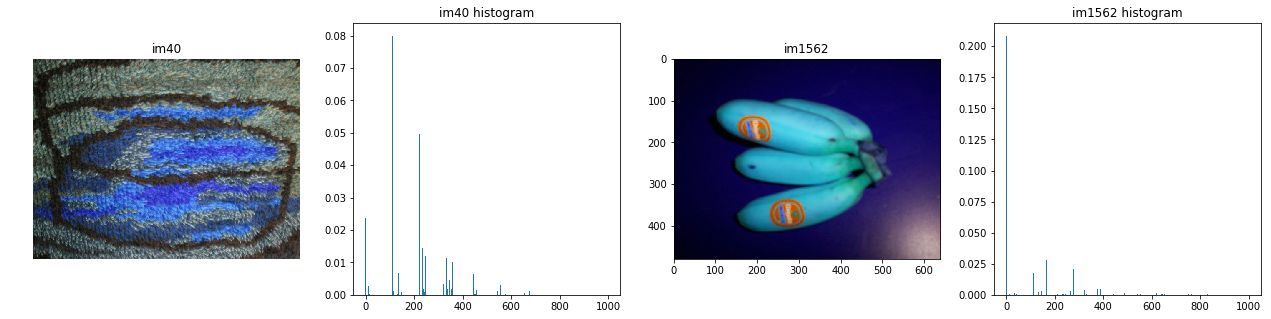

In [34]:
  fig,axs = plt.subplots(1, 4)
  fig.set_figheight(5)
  fig.set_figwidth(22)
  # removing axes
  axs[0].set_axis_off()
  axs[0].imshow(im40)
  axs[0].set_title("im40")
  axs[1].bar(range(len(color.histogram(im40,  n_bin=n_bin))), color.histogram(im40,  n_bin=n_bin))
  axs[1].set_title("im40 histogram")
  axs[2].imshow(im1562)
  axs[2].set_title("im1562")
  axs[3].bar(range(len(color.histogram(im1562,  n_bin=n_bin))), color.histogram(im1562,  n_bin=n_bin))
  axs[3].set_title("im1562 histogram")


#### Problem 5

Try to improve the results by using a different feature or distance metrics (bag of
words, 3d-color histograms etc) of your choice. Justify your choice with qualitative reasons and
back it up with performance comparison results.

As explained in Problem4 using L1 norm instead of L2 helped in case of image 1562

Computed using my own implementation. As a distnace L1 norm is used


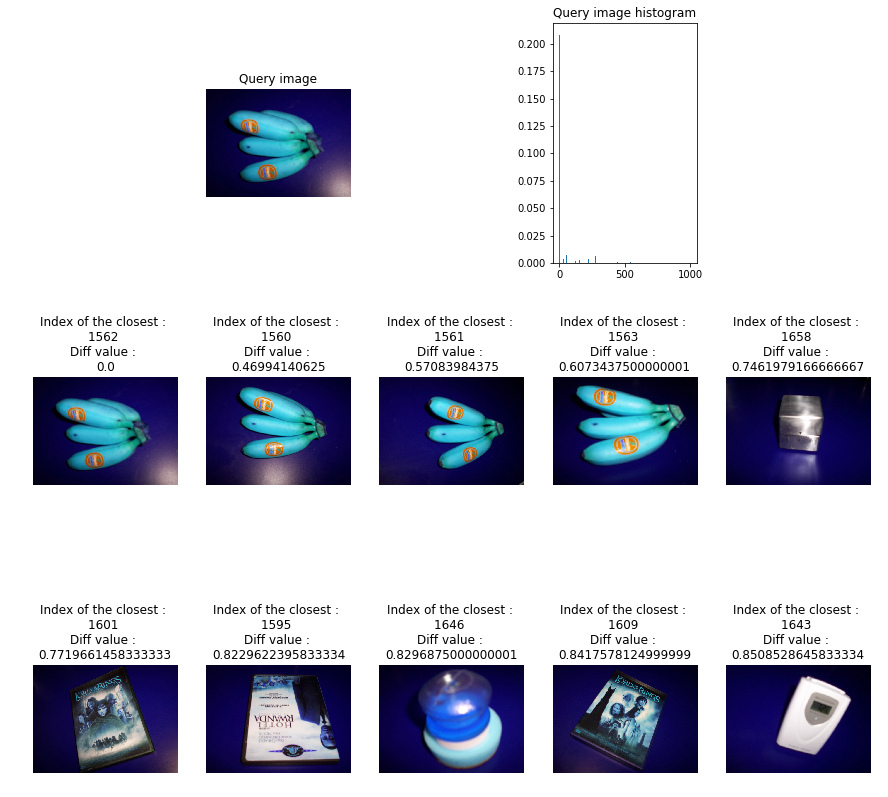

In [35]:
print("Computed using my own implementation. As a distnace L1 norm is used")
plot_10_for_image(im1562,color.histogram(im1562,  n_bin=n_bin), histograms_own, images1, n_bin,'L1')